In [14]:
import os
import keras
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras import layers
from keras import callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [15]:
# Specify GPU usage
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
input_size = 256
image_dimensions = (input_size, input_size)

# Normalize image color values
datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

# Build training generator dataset
train_generator = datagen.flow_from_directory(
    '../data/train',
    target_size = image_dimensions,
    batch_size = 32,
    class_mode ='categorical',
    color_mode = 'rgb',
    shuffle=True
)

# Normalize image color values
test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

# Build testing generator dataset
test_generator = test_datagen.flow_from_directory(
    '../data/test',
    target_size = image_dimensions,
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = False
)

Found 4529 images belonging to 5 classes.
Found 1127 images belonging to 5 classes.


In [17]:
########### CODE PROVIDED BY PROFESSOR ###########
model = keras.Sequential([
    keras.Input(shape=(input_size, input_size, 3)),  # Explicit Input Layer
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(5, activation="softmax")  # 5 classes output
])

In [18]:
########### CODE PROVIDED BY PROFESSOR ###########
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    67,108,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,202,885 (256.36 MB)

 Trainable params: 67,202,885 (256.36 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
########### CODE PROVIDED BY PROFESSOR ###########
model.compile(
	optimizer="adam",
    loss="categorical_crossentropy",
	metrics=["accuracy"]
)

In [20]:
# Setup callbacks
early_stopping = callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)
model_checkpoint = callbacks.ModelCheckpoint('best_model.h5', monitor = 'val_loss', save_best_only = True)

In [21]:
history = model.fit(
    train_generator,
    epochs = 30,
    callbacks = [early_stopping , model_checkpoint],
    validation_data = test_generator,
    verbose = 2
)

Epoch 1/30


142/142 - 39s - 275ms/step - accuracy: 0.3140 - loss: 5.2948 - val_accuracy: 0.4712 - val_loss: 1.3261
Epoch 2/30


142/142 - 38s - 268ms/step - accuracy: 0.3654 - loss: 1.7459 - val_accuracy: 0.4712 - val_loss: 1.2817
Epoch 3/30


142/142 - 37s - 259ms/step - accuracy: 0.4303 - loss: 1.4893 - val_accuracy: 0.4729 - val_loss: 1.2725
Epoch 4/30
142/142 - 36s - 251ms/step - accuracy: 0.4060 - loss: 1.5399 - val_accuracy: 0.4729 - val_loss: 1.3671
Epoch 5/30
142/142 - 36s - 252ms/step - accuracy: 0.4113 - loss: 1.5258 - val_accuracy: 0.4925 - val_loss: 1.2831
Epoch 6/30
142/142 - 35s - 249ms/step - accuracy: 0.3679 - loss: 2.0974 - val_accuracy: 0.4729 - val_loss: 1.5077
Epoch 7/30


142/142 - 38s - 264ms/step - accuracy: 0.4394 - loss: 1.4416 - val_accuracy: 0.5058 - val_loss: 1.2381
Epoch 8/30
142/142 - 36s - 254ms/step - accuracy: 0.4630 - loss: 1.4450 - val_accuracy: 0.5173 - val_loss: 1.2580
Epoch 9/30


142/142 - 38s - 265ms/step - accuracy: 0.4454 - loss: 1.5722 - val_accuracy: 0.5067 - val_loss: 1.2075
Epoch 10/30
142/142 - 36s - 256ms/step - accuracy: 0.4606 - loss: 1.4364 - val_accuracy: 0.5546 - val_loss: 1.3622
Epoch 11/30
142/142 - 37s - 264ms/step - accuracy: 0.4610 - loss: 1.5034 - val_accuracy: 0.5439 - val_loss: 1.2713
Epoch 12/30
142/142 - 36s - 255ms/step - accuracy: 0.4657 - loss: 1.5217 - val_accuracy: 0.5972 - val_loss: 1.3800
Epoch 13/30


142/142 - 37s - 259ms/step - accuracy: 0.4807 - loss: 1.4803 - val_accuracy: 0.6043 - val_loss: 1.1288
Epoch 14/30
142/142 - 36s - 252ms/step - accuracy: 0.4811 - loss: 1.4902 - val_accuracy: 0.5821 - val_loss: 1.1429
Epoch 15/30
142/142 - 36s - 253ms/step - accuracy: 0.5120 - loss: 1.3368 - val_accuracy: 0.6043 - val_loss: 1.1740
Epoch 16/30
142/142 - 36s - 251ms/step - accuracy: 0.5299 - loss: 1.3396 - val_accuracy: 0.5980 - val_loss: 1.2408
Epoch 17/30
142/142 - 36s - 252ms/step - accuracy: 0.5253 - loss: 1.3250 - val_accuracy: 0.5342 - val_loss: 1.2013
Epoch 18/30


142/142 - 36s - 254ms/step - accuracy: 0.5352 - loss: 1.2805 - val_accuracy: 0.6149 - val_loss: 1.1286
Epoch 19/30


142/142 - 36s - 256ms/step - accuracy: 0.5524 - loss: 1.2778 - val_accuracy: 0.6220 - val_loss: 1.0930
Epoch 20/30
142/142 - 35s - 248ms/step - accuracy: 0.5337 - loss: 1.2956 - val_accuracy: 0.5989 - val_loss: 1.1384
Epoch 21/30


142/142 - 37s - 260ms/step - accuracy: 0.5529 - loss: 1.2723 - val_accuracy: 0.6185 - val_loss: 1.0510
Epoch 22/30
142/142 - 36s - 251ms/step - accuracy: 0.5639 - loss: 1.2086 - val_accuracy: 0.5652 - val_loss: 1.3379
Epoch 23/30
142/142 - 36s - 257ms/step - accuracy: 0.5445 - loss: 1.2815 - val_accuracy: 0.5989 - val_loss: 1.1062
Epoch 24/30
142/142 - 36s - 251ms/step - accuracy: 0.5593 - loss: 1.2452 - val_accuracy: 0.6096 - val_loss: 1.1143
Epoch 25/30
142/142 - 36s - 252ms/step - accuracy: 0.5692 - loss: 1.2214 - val_accuracy: 0.6211 - val_loss: 1.1829
Epoch 26/30
142/142 - 36s - 252ms/step - accuracy: 0.5637 - loss: 1.2401 - val_accuracy: 0.6256 - val_loss: 1.0714


In [22]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

36/36 - 2s - 65ms/step - accuracy: 0.6185 - loss: 1.0510
Test loss: 1.0509976148605347
Test accuracy: 0.6184560656547546


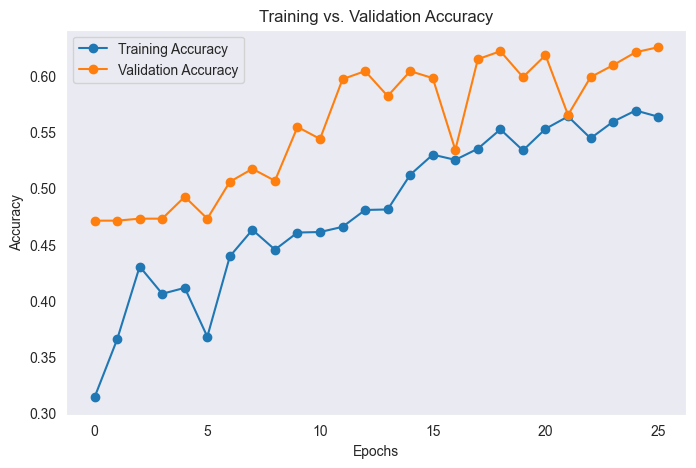

In [23]:
# Plot training vs validation accuracy
plt.figure(figsize = (8, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', marker = 'o')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.grid()
plt.show()